In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

data=pd.read_csv("cities_by_hours.csv",header=0, index_col=0, parse_dates=True, squeeze=True)

data.head()

,Datetime,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,C6H6,C7H8,C8H10,AQI,AQI_Bucket
City,,,,,,,,,,,,,,,
Ahmedabad,1/1/2015 1:00,NaN,NaN,1.00,40.01,36.37,NaN,1.00,122.07,NaN,0.0,0.0,0.0,NaN,NaN
Ahmedabad,1/1/2015 2:00,NaN,NaN,0.02,27.75,19.73,NaN,0.02,85.90,NaN,0.0,0.0,0.0,NaN,NaN
Ahmedabad,1/1/2015 3:00,NaN,NaN,0.08,19.32,11.08,NaN,0.08,52.83,NaN,0.0,0.0,0.0,NaN,NaN
Ahmedabad,1/1/2015 4:00,NaN,NaN,0.30,16.45,9.20,NaN,0.30,39.53,153.58,0.0,0.0,0.0,NaN,NaN
Ahmedabad,1/1/2015 5:00,NaN,NaN,0.12,14.90,7.85,NaN,0.12,32.63,NaN,0.0,0.0,0.0,NaN,NaN


In [7]:
data['Datetime'] = pd.to_datetime(data['Datetime'],infer_datetime_format=True)
data.isnull().sum()

Datetime           0
PM2.5         145088
PM10          296737
NO            116632
NO2           117122
NOx           123224
NH3           272542
CO             86517
SO2           130373
O3            129208
C6H6          163646
C7H8          220607
C8H10         455829
AQI           129080
AQI_Bucket    129080
dtype: int64

In [8]:
data = data.drop(['C6H6','C8H10','C7H8','NH3','PM10'],axis=1)

In [9]:
data.columns

Index(['Datetime', 'PM2.5', 'NO', 'NO2', 'NOx', 'CO', 'SO2', 'O3', 'AQI',
       'AQI_Bucket'],
      dtype='object')

In [10]:
data['AQI_Bucket'] = data['AQI_Bucket'].astype('category')
from sklearn.preprocessing import LabelEncoder
label_object = {}
labelencoder = LabelEncoder()
labelencoder.fit(data['AQI_Bucket'])
data['AQI_Bucket'] = labelencoder.fit_transform(data['AQI_Bucket'])
label_object['AQI_Bucket'] = labelencoder
data.dtypes

Datetime      datetime64[ns]
PM2.5                float64
NO                   float64
NO2                  float64
NOx                  float64
CO                   float64
SO2                  float64
O3                   float64
AQI                  float64
AQI_Bucket             int32
dtype: object

In [11]:
data["NO"]=data["NO"].fillna(data.NO2.mean())
data["NO2"]=data["NO2"].fillna(data.NO2.mean())
data["NOx"]=data["NOx"].fillna(data.NOx.mean())
data["CO"]=data["CO"].fillna(data.CO.mean())
data["SO2"]=data["SO2"].fillna(data.SO2.mean())
data["O3"]=data["O3"].fillna(data.O3.mean())
data["AQI"]=data["AQI"].fillna(data.AQI.mean())
data["PM2.5"]=data["PM2.5"].fillna(data['PM2.5'].mean())

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 707875 entries, Ahmedabad to Visakhapatnam
Data columns (total 10 columns):
Datetime      707875 non-null datetime64[ns]
PM2.5         707875 non-null float64
NO            707875 non-null float64
NO2           707875 non-null float64
NOx           707875 non-null float64
CO            707875 non-null float64
SO2           707875 non-null float64
O3            707875 non-null float64
AQI           707875 non-null float64
AQI_Bucket    707875 non-null int32
dtypes: datetime64[ns](1), float64(8), int32(1)
memory usage: 56.7+ MB


In [13]:
data_new = data.set_index('Datetime')
data.index

Index(['Ahmedabad', 'Ahmedabad', 'Ahmedabad', 'Ahmedabad', 'Ahmedabad',
       'Ahmedabad', 'Ahmedabad', 'Ahmedabad', 'Ahmedabad', 'Ahmedabad',
       ...
       'Visakhapatnam', 'Visakhapatnam', 'Visakhapatnam', 'Visakhapatnam',
       'Visakhapatnam', 'Visakhapatnam', 'Visakhapatnam', 'Visakhapatnam',
       'Visakhapatnam', 'Visakhapatnam'],
      dtype='object', name='City', length=707875)

In [14]:
y = data_new['AQI'].resample('MS').mean()

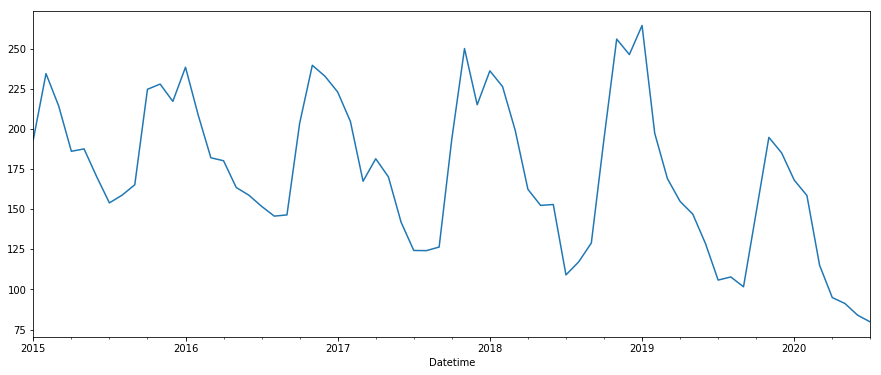

In [16]:
y.plot(figsize=(15, 6))
plt.show()

In [17]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import matplotlib
matplotlib.rcParams['axes.labelsize'] = 14
matplotlib.rcParams['xtick.labelsize'] = 12
matplotlib.rcParams['ytick.labelsize'] = 12
matplotlib.rcParams['text.color'] = 'k'

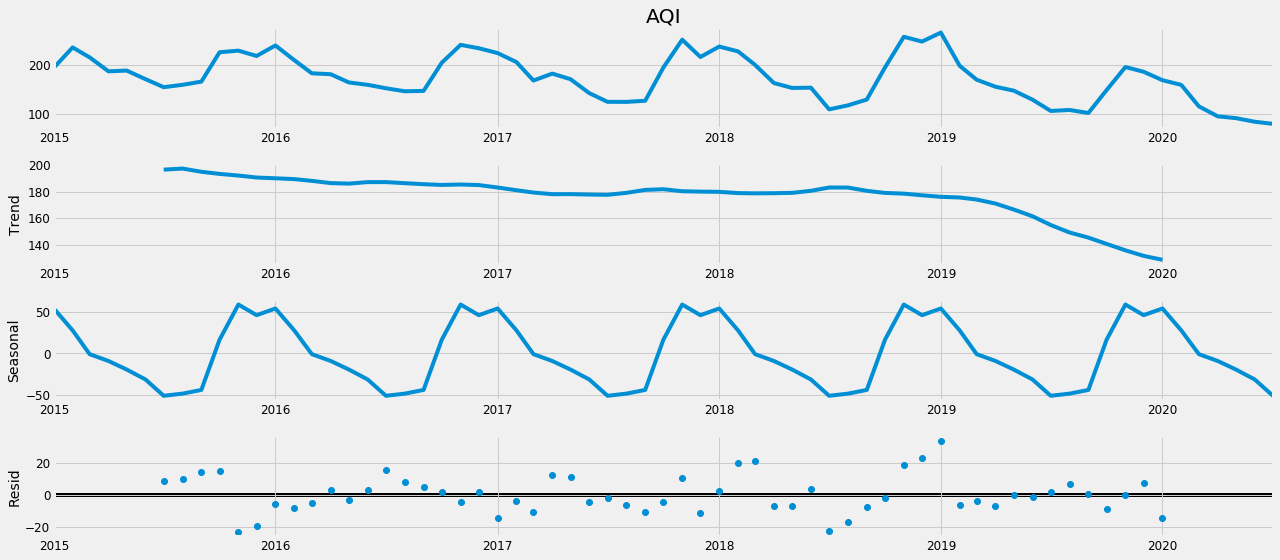

In [18]:
from pylab import rcParams
rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(y, model='additive')
fig = decomposition.plot()
plt.show()

In [19]:
p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]
print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

In [20]:
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(y,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()
            print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)
ARIMA(0, 0, 0)x(0, 0, 0, 12)12 - AIC:873.891375050186
ARIMA(0, 0, 0)x(0, 0, 1, 12)12 - AIC:668.8532259879546
ARIMA(0, 0, 0)x(0, 1, 0, 12)12 - AIC:521.1647592717862
ARIMA(0, 0, 0)x(0, 1, 1, 12)12 - AIC:414.4845175707358
ARIMA(0, 0, 0)x(1, 0, 0, 12)12 - AIC:519.3851963185267
ARIMA(0, 0, 0)x(1, 0, 1, 12)12 - AIC:501.95329062677087
ARIMA(0, 0, 0)x(1, 1, 0, 12)12 - AIC:423.357533041173
ARIMA(0, 0, 0)x(1, 1, 1, 12)12 - AIC:416.37038101099574
ARIMA(0, 0, 1)x(0, 0, 0, 12)12 - AIC:779.2935515540933
ARIMA(0, 0, 1)x(0, 0, 1, 12)12 - AIC:592.2324042323481
ARIMA(0, 0, 1)x(0, 1, 0, 12)12 - AIC:484.4622399104097
ARIMA(0, 0, 1)x(0, 1, 1, 12)12 - AIC:383.40496899607257
ARIMA(0, 0, 1)x(1, 0, 0, 12)12 - AIC:499.70898858633444
ARIMA(0, 0, 1)x(1, 0, 1, 12)12 - AIC:479.2398953876951
ARIMA(0, 0, 1)x(1, 1, 0, 12)12 

In [21]:
mod = sm.tsa.statespace.SARIMAX(y,
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results = mod.fit()
print(results.summary().tables[1])

                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3555      0.333      1.066      0.286      -0.298       1.009
ma.L1         -0.6885      0.296     -2.325      0.020      -1.269      -0.108
ma.S.L12      -1.0000   5897.991     -0.000      1.000   -1.16e+04    1.16e+04
sigma2       199.5701   1.18e+06      0.000      1.000   -2.31e+06    2.31e+06


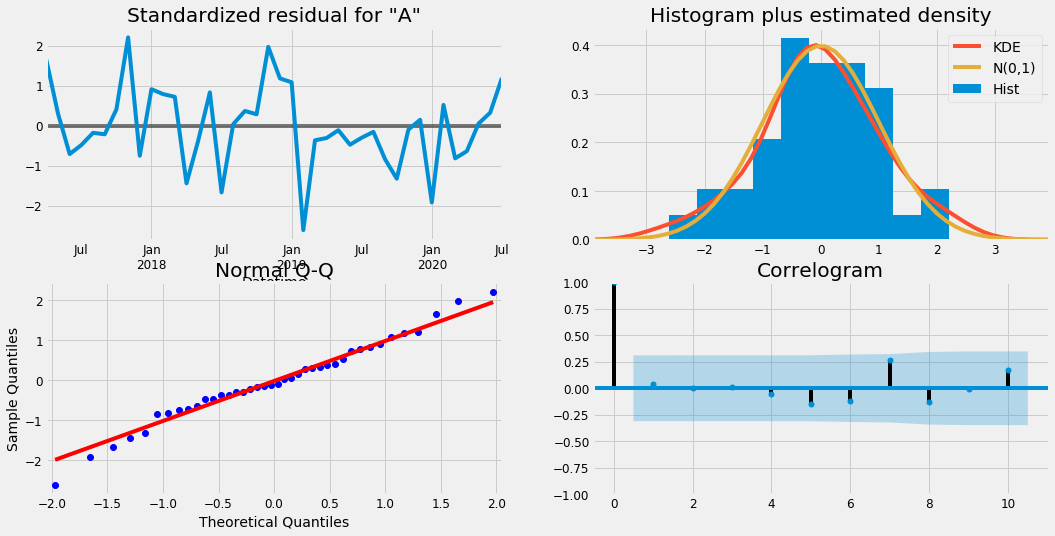

In [22]:
results.plot_diagnostics(figsize=(16, 8))
plt.show()

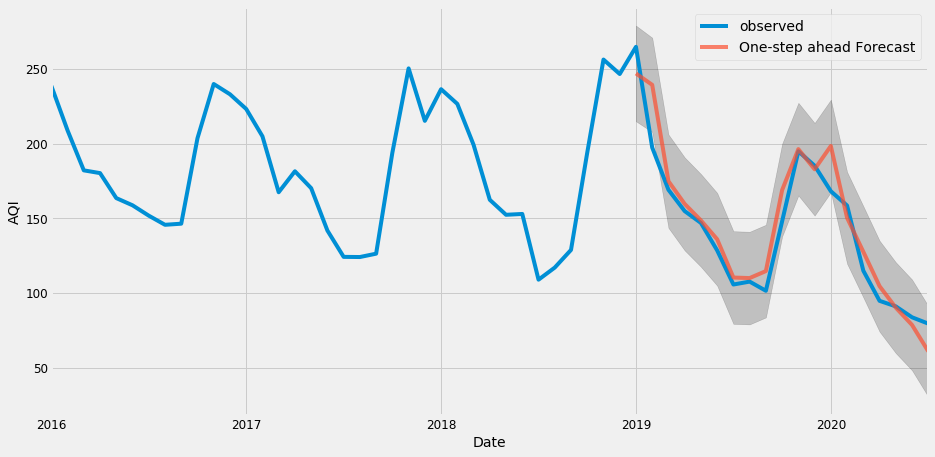

In [23]:
pred = results.get_prediction(start=pd.to_datetime('2019-01-01'), dynamic=False)
pred_ci = pred.conf_int()
ax = y['2016':].plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('AQI')
plt.legend()
plt.show()

In [24]:
y_forecasted = pred.predicted_mean
y_truth = y['2019-01-01':]
mse = ((y_forecasted - y_truth) ** 2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))
from sklearn.metrics import r2_score
print("R2 score : %.2f" % r2_score(y_forecasted , y_truth))

The Mean Squared Error of our forecasts is 233.51
R2 score : 0.91
